# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [45]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(8)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1
5,Diego,60,Engenheiro,15000,2000,1,Solteiro,1
6,Denize,22,Estudante,1200,500,0,Solteiro,0
7,Claudio,24,Estudante,1500,250,1,Solteiro,0


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

### Tratando os dados antes de criar os gráficos

In [46]:
#Alterando o tipo das colunas Salário e Limite_Crédito para fazer os cálculos necessários
df['Salário'] = df['Salário'].astype(int)
df['Limite_Credito'] = df['Limite_Credito'].astype(int)

#Alterando o conteúdo dos dados da coluna "historico_inadimplente", para melhor visualização nos gráficos
mapeamento_historico_inadimplente = {
    '1': 'Possui Histórico de Inadimplência',
    '0': 'Não Possui Histórico de Inadimplência'
}

df['Historico_Inadimplencia'] = df['Historico_Inadimplencia'].replace(mapeamento_historico_inadimplente)


#Alterando o conteúdo dos dados da coluna "imovel_proprio", para melhor visualização nos gráficos
mapeamento_imovel_proprio = {
    '1': 'Possui Imóvel Próprio',
    '0': 'Não Possui Imóvel Próprio'
}

df['Imovel_Proprio'] = df['Imovel_Proprio'].replace(mapeamento_imovel_proprio)

print('Tipo de dados: \n', df.dtypes)
df.head(8)

Tipo de dados: 
 Nome                       object
Idade                       int64
Profissão                  object
Salário                     int64
Limite_Credito              int64
Historico_Inadimplencia    object
Estado_Civil               object
Imovel_Proprio             object
dtype: object


,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,Não Possui Histórico de Inadimplência,Casamento,Não Possui Imóvel Próprio
1,Joao,30,Médico,8000,4000,Não Possui Histórico de Inadimplência,Casamento,Não Possui Imóvel Próprio
2,Charlie,35,Professor,5000,4000,Não Possui Histórico de Inadimplência,Solteiro,Não Possui Imóvel Próprio
3,David,40,Advogado,10000,1000,Possui Histórico de Inadimplência,Solteiro,Possui Imóvel Próprio
4,Eva,45,Médico,12000,10000,Não Possui Histórico de Inadimplência,Casamento,Possui Imóvel Próprio
5,Diego,60,Engenheiro,15000,2000,Possui Histórico de Inadimplência,Solteiro,Possui Imóvel Próprio
6,Denize,22,Estudante,1200,500,Não Possui Histórico de Inadimplência,Solteiro,Não Possui Imóvel Próprio
7,Claudio,24,Estudante,1500,250,Possui Histórico de Inadimplência,Solteiro,Não Possui Imóvel Próprio


In [47]:
# Calculando a média do Salário para cada Idade
media_salario_por_idade = df.groupby(['Idade'])['Salário'].mean()

# Ordenando as idades em ordem crescente
media_salario_por_idade = media_salario_por_idade.sort_index()

# Calculando a média do Limite de Crédito para cada Idade
media_limite_credito_por_idade = df.groupby('Idade')['Limite_Credito'].mean()

# Ordenando as idades em ordem crescente
media_limite_credito_por_idade = media_limite_credito_por_idade.sort_index()

media_salario_por_idade = df.groupby(['Idade'])['Salário'].mean()

print(media_limite_credito_por_idade.head(8))
print(media_salario_por_idade.head(8))

Idade
22      500.0
24      250.0
25     2500.0
30     4000.0
35     4000.0
40     1000.0
45    10000.0
60     2000.0
Name: Limite_Credito, dtype: float64
Idade
22     1200.0
24     1500.0
25     4500.0
30     8000.0
35     5000.0
40    10000.0
45    12000.0
60    15000.0
Name: Salário, dtype: float64


### O gráfico abaixo é importante pois mostra a tendência do limite de crédito pela tanto pela idade quanto pelo salário das pessoas.

### Analisando o gráfico em questão nota-se que pessoas com pouca idade e pessoas idade mais elevada tendem a ter um limite de crédito inferior a média e pessoas com idade mediana possuem limites de créditos maiores. Por outro lado pessoas que possuem altos salários não necessariamente terá um limite de crédito acima da média depedente outros fatores, porém pessoas com baixos salários possuem limites de crédito condizentes com o salário.

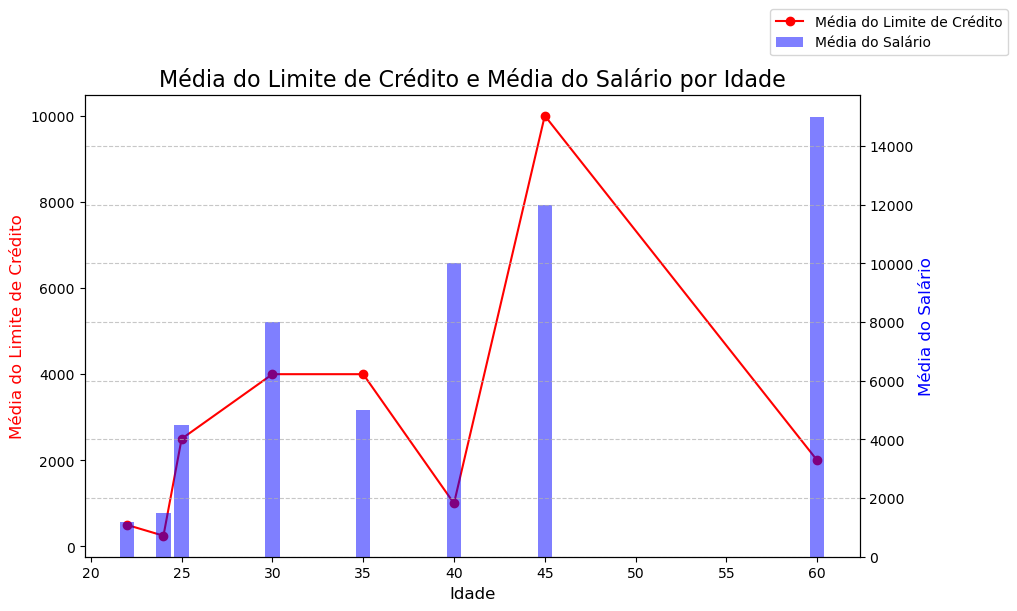

In [48]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(media_limite_credito_por_idade.index, media_limite_credito_por_idade, marker='o', color='red', label='Média do Limite de Crédito')
ax1.set_xlabel('Idade', fontsize=12)
ax1.set_ylabel('Média do Limite de Crédito', color='red', fontsize=12)

ax2 = ax1.twinx()
ax2.bar(media_salario_por_idade.index, media_salario_por_idade, color='blue', alpha=0.5, label='Média do Salário')
ax2.set_ylabel('Média do Salário', color='blue', fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', bbox_to_anchor=(1.2, 1.2))
# Neste código, bbox_to_anchor=(1.2, 1.2) especifica que a legenda será posicionada a uma distância de 1.2 unidades da largura do gráfico e 1.2 unidade da altura do gráfico

plt.title('Média do Limite de Crédito e Média do Salário por Idade', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### O gráfico abaixo é importante pois compara o limite de crédito das pessoas que possuem histórico de inadimplência.

### Observando o gráfico "Histórico de Inadimplencia por Limite de Crédito" claramente se nota que pessoas com histórico de inadimplência possuem muito menos limite de crédito do que pessoas que não possuem, pessoas que não possuem histórico de inadimplência chegam a ter um limite de crédito de mais de 58% em comparação a pessoas que possuem esse histórico negativo.

### Segundo o gráfico "Limite de Crédito Por Pessoas Que Possuem Imóvel Próprio" percebe-se que pessoas que possuem imóvel próprio possuem limite de crédito maior em comparação a pessoas que não possuem, para ser mais preciso cerca de 31% a mais.

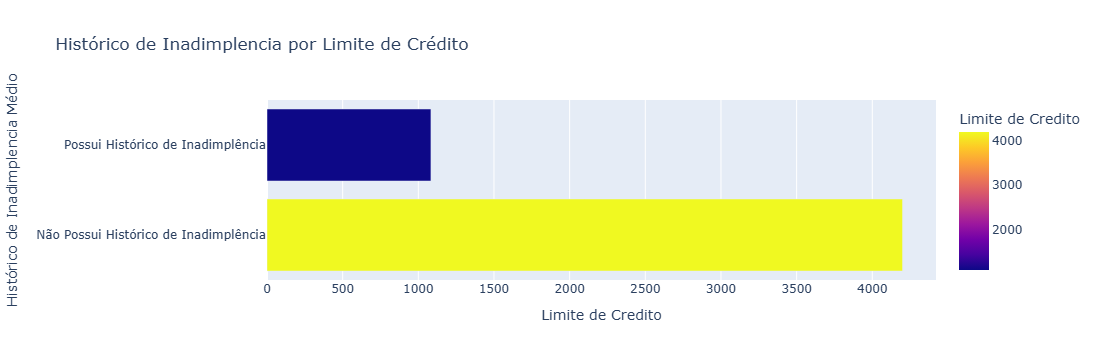

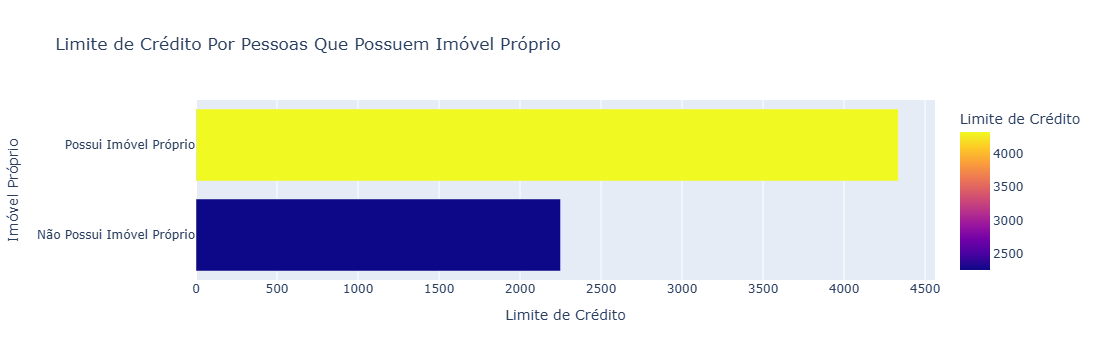

In [49]:
#Gráfico de barras horizontais, Histórico de Inandimplência por Limite de Crédito Médio
limite_credito_por_historico_inadimplencia = df.groupby('Historico_Inadimplencia')['Limite_Credito'].mean().reset_index()

fig = px.bar(limite_credito_por_historico_inadimplencia, x='Limite_Credito', y='Historico_Inadimplencia', orientation='h',
             title='Histórico de Inadimplencia por Limite de Crédito',
             labels={'Limite_Credito': 'Limite de Credito', 'Historico_Inadimplencia': 'Histórico de Inadimplencia Médio'},
             color='Limite_Credito',  # Especificando a cor baseada nos valores de salário
             width=1000)        # Definindo a largura do gráfico em pixels

fig.show()


limite_credito_por_imovel_proprio = df.groupby('Imovel_Proprio')['Limite_Credito'].mean().reset_index()

fig = px.bar(limite_credito_por_imovel_proprio, x='Limite_Credito', y='Imovel_Proprio', orientation='h',
            title='Limite de Crédito Por Pessoas Que Possuem Imóvel Próprio',
            labels={'Limite_Credito': 'Limite de Crédito', 'Imovel_Proprio': 'Imóvel Próprio'},
            color='Limite_Credito',
            width=1000)

fig.show()
     

### O gráfico treemap é importante, pois traz a visualização dos dados de forma hierarquica e categórica, onde podemos identificar quais profissões e quais estados civis possuem maior limite de crédito.

### De acordo com a visualização percebe-se que profissões como médico e engenheiro possuem como soberanos os limites de crédito dos profissionais casados, por outra lado em profissões como professor, advogado e estudante o que se sobresaem são os profissionais solteiros, porém os casados representam 69,10% do limite de crédito total enquanto os solteiros representam apenas 30,90% do limite de crédito total, ou seja o profissinal de estado civil casado possui maior probabilidade de ter um limite de crédito maior, que os solteiros, muito por conta dos médicos.

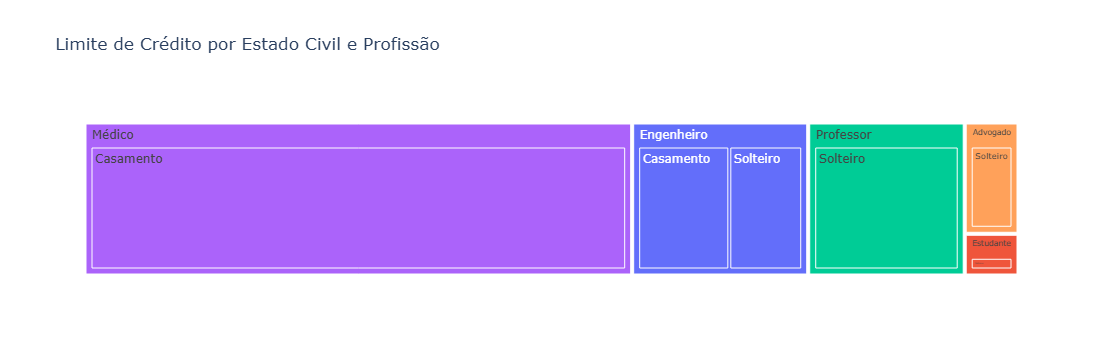

In [44]:
#Agrupando Estado Civil e Profissão por Limite de Crédito
limite_credito_por_profissao_estadocivil = df.groupby(['Estado_Civil', 'Profissão'])['Limite_Credito'].mean().reset_index()

fig = px.treemap(limite_credito_por_profissao_estadocivil,
                path=['Profissão', 'Estado_Civil'],
                values='Limite_Credito',
                title='Limite de Crédito por Estado Civil e Profissão',
                color='Profissão')
fig.show()